In [1]:
%matplotlib inline
import math,sys, os, numpy as np
from numpy.linalg import norm
from PIL import Image
from matplotlib import pyplot as plt, rcParams, rc
from scipy.ndimage import imread
from skimage.measure import block_reduce
import pickle as pickle
from scipy.ndimage.filters import correlate, convolve
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 6
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
# Boiler plate code that can be stolen from internet 
def plots(ims, interp=False, titles=None):  #ims
    ims=np.array(ims)
    mn,mx=ims.min(),ims.max()
    f = plt.figure(figsize=(12,24))
    for i in range(len(ims)):
        sp=f.add_subplot(1, len(ims), i+1)
        if not titles is None: sp.set_title(titles[i], fontsize=18)
        plt.imshow(ims[i], interpolation=None if interp else 'none', vmin=mn,vmax=mx)

def plot(im, interp=False):   # im 
    f = plt.figure(figsize=(3,6), frameon=True)
    plt.imshow(im, interpolation=None if interp else 'none')

plt.gray()
plt.close()

In [3]:
from sklearn.datasets import fetch_openml


mnist = fetch_openml('mnist_784')

In [6]:
class Decide:
    def __init__(self, name):
        self.name = name
    pass

a = Decide('abhimanyu')

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [7]:
mnist['data'].shape #784 flat array [234,34,4,445] 

(70000, 784)

In [8]:
mnist['data'].shape, mnist['target'].shape

((70000, 784), (70000,))

In [9]:
images = np.reshape(mnist['data'], (70000, 28, 28))
labels = mnist['target'].astype(int) # for label we are converting them into integers
n = len(images)
images.shape, labels.shape

((70000, 28, 28), (70000,))

In [10]:
labels[:5]

array([5, 0, 4, 1, 9])

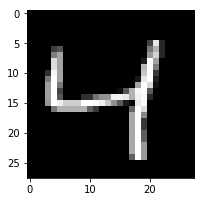

In [11]:
plot(images[2])

In [12]:
images = images/255 #why? it would work properly but it comes up later when
# we use correlate so we are trying convert them into numbers b/w 0 & 1.
# it would still work 0, 255. ...kind a way of normalising 

# rachael bhunde hai moo aali ne khud ni bera toh confuse kar diya...dhamchi ne

In [13]:
images[0].shape

(28, 28)

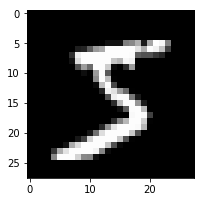

In [14]:
plot(images[0])

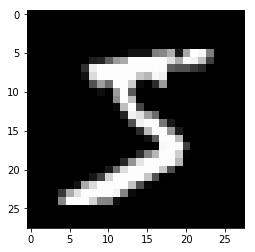

In [15]:
plt.imshow(images[0])

In [16]:
labels[0]

5

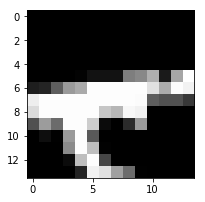

In [17]:
plot(images[0, 0:14, 8:22]) # we can also zoom in...

# Edge detection

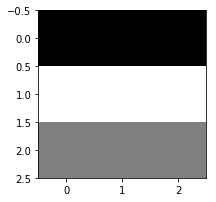

In [18]:
# we will look at how to crate an edge detector

#input * Filter 

top = [[-1,-1,-1],
       [ 1, 1, 1],
       [ 0, 0, 0]]

plot(top)

In [19]:
dims = np.index_exp[10:28:1, 3:13]
images[0][dims]

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0549, 0.0039, 0.6039, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.5451, 0.9922],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0431, 0.7451],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1373],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.1529],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0941, 0.4471, 0.8667],
       [0.    , 0.   

In [20]:
corrtop = correlate(images[0], top)

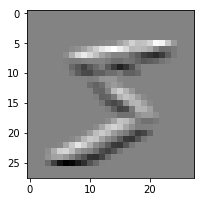

In [21]:
plot(corrtop)

In [22]:
#what's going on top filter
"""
How could we maximize top with something
element wise multiplication...filter to element wise
"""

'\nHow could we maximize top with something\nelement wise multiplication...filter to element wise\n'

In [23]:
# convolution vs correlation
# convolutions are just flipped ........kind of same
# rotated read this shit....rachel is shit...kaamini this is different from correlation statistics between differnet variables 

In [24]:
np.rot90(top,1) # write this yourself

array([[-1,  1,  0],
       [-1,  1,  0],
       [-1,  1,  0]])

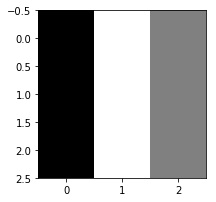

In [25]:
plot(np.rot90(top,1))

In [26]:
np.rot90(top,2)

array([[ 0,  0,  0],
       [ 1,  1,  1],
       [-1, -1, -1]])

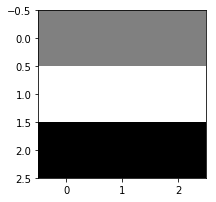

In [27]:
plot(np.rot90(top,2))

True

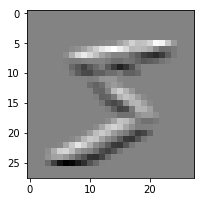

In [28]:
convtop = convolve(images[0], np.rot90(top,2))
plot(convtop)
np.allclose(convtop, corrtop) # it's rotated so it's same thing 

In [29]:
# np.rot90

In [30]:
# Algorithm rotate a matrix by 90

a = [[1,2,3],[14,5,6], [34,4,6]]
# rotate it by 90 degrees

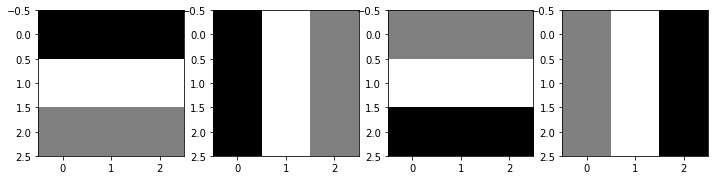

In [34]:
straights = [np.rot90(top,i) for i in range(4)]
plots(straights)